#Programação para Ciência de Dados

##Alunos:
**Gian Giovanni Rodrigues Da Silva**

**Jessyca Jordanna Barroso De Moraes**


#O Dataset

In [1]:
#Importa Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Dataset 
df_covid = pd.read_csv('http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz', compression='gzip')
df_covid

dados-curso-completo.csv  ...                  hashtags
0            2020-03-23 18:51:14  ...                        []
1            2020-03-18 03:18:14  ...                        []
2            2020-03-29 12:09:27  ...                        []
3            2020-04-01 21:11:07  ...                        []
4            2020-03-19 17:49:40  ...                        []
...                          ...  ...                       ...
1658821      2020-05-12 13:02:34  ...                        []
1658822      2020-03-19 18:16:30  ...           ['CORONAVIRUS']
1658823      2020-04-07 18:14:45  ...  ['BolsonaroTemRazaoSim']
1658824      2020-06-02 16:04:51  ...                        []
1658825                      NaN  ...                       NaN

[1658826 rows x 13 columns]

#Visão Geral dos Dados

##Sem processamento

###Relatório

In [3]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=fd686ddd7584b818ee2e8579a270c6cb04535dde31f5c17ed732e28af2ad5c52
  Stored in directory: /tmp/pip-ephem-wheel-cache-mksrhc3r/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [4]:
#Importando o ProfileReport
from pandas_profiling import ProfileReport

In [5]:
#Executando o profile
profile = ProfileReport(df_covid, title = 'Relatório - Pandas Profiling', html = {'style': {'full_width': True}}, minimal = True)
profile

In [6]:
#Fazendo download do relatório (disponível na aba à esquerda, ícone pasta)
profile.to_file(output_file = "dataframe_report_original.html")

In [7]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


###Análises

O dataset:

*   Número de Variáveis - 13;
  *   9 Categóricas;
  *   4 Numéricas.
*   Número de Observações - 1658826.

De acordo com o relatório acima, **37.3%** do dataset correspondem à **dados faltantes**. As variáveis que possuem mais dados faltantes são:

*   Latitude - 99.5%;
*   Longitude - 99.5%
*   Lugar - 95.5%;
*   País - 95.5%;
*   Sigla - 95.5%.

Dois dos usuários que mais possuem comentários no dataset são canais de notícia de Portugal, inclusive uma delas aparece duas vezes por terem nome de usuários diferentes.

*   Agência Lusa - 1404;
*   tvi24 Últimas (1181) e tvi24 (1178) - 2359.

A coluna retweet tem valores que variam de 0 (1314424	ou 79.2%) a 1139763 (1 ou < 0.1%), fazendo com que os dados tenham uma assimetria positiva ou à direita, ou seja, maior que 0 (75.73862462). Esse comportamento pode ser melhor observado no gráfico abaixo.















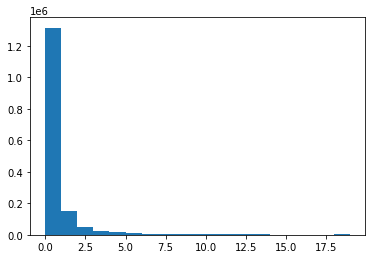

In [8]:
plt.hist(df_covid['retweet'], bins=range(0, 20));

Os dados da coluna seguidores apresentam o mesmo comportamento descrito anteriormente. O usuário com o maior número de seguidores é o Donald Trump.

In [9]:
df_covid.loc[df_covid.seguidores == 84241250]

dados-curso-completo.csv          usuario  ... longitude hashtags
788393      2020-05-23 23:08:17  Donald J. Trump  ...       NaN       []

[1 rows x 13 columns]

A maioria dos textos estão no idioma português (95.7%), porém o relatório mostra que apenas 4.3% dos tweets são do Brasil e de Portugal. Outros países que tem como um de seus idiomas o português, correspondem a menos de 1% do dataset. Esse desencontro entre as informações se deve provavelmente aos dados faltantes na coluna País.

##Com processamento

###Criação do dataframe com perguntas

In [10]:
#Selecionando somente texto com perguntas
df_processado = df_covid[df_covid['texto'].str.contains('\?', na = False)]
pd.set_option('display.max_info_columns', 5000)
df_processado.reset_index(inplace = True, drop = True)
df_processado

dados-curso-completo.csv  ...                              hashtags
0           2020-03-23 18:51:14  ...                                    []
1           2020-04-01 21:11:07  ...                                    []
2           2020-06-25 11:09:19  ...                                    []
3           2020-04-06 15:44:36  ...  ['COVID19', 'floripa', 'isolamento']
4           2020-03-30 00:43:36  ...                                    []
...                         ...  ...                                   ...
172496      2020-03-24 23:50:14  ...                                    []
172497      2020-03-26 21:43:24  ...                                    []
172498      2020-05-25 22:53:13  ...                                    []
172499      2020-03-13 17:26:18  ...                                    []
172500      2020-05-12 13:02:34  ...                                    []

[172501 rows x 13 columns]

In [11]:
#Separando as perguntas e colocando-as com os seus dados em listas
datas = []
usuarios = []
textos = []
retweets = []
num_seg = []
lugares = []
paises = []

import re
for index, row in df_processado.iterrows():
#for x in df_processado['texto']:
  if row['texto'].find(" ?"):
    row['texto'] = row['texto'].replace(" ?","?")
  m = re.split('(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)(\s|[A-Z].*)', row['texto'])
  for i in m:
    if i.count("?") > 0:
      datas.append(row['dados-curso-completo.csv'])
      usuarios.append(row['usuario'])
      textos.append(i)
      retweets.append(row['retweet'])
      num_seg.append(row['seguidores'])
      lugares.append(row['lugar'])
      paises.append(row['pais'])

In [12]:
#Criando dataframe com os dados processados a partir de um dicionário de listas
dados = {'dados-curso-completo.csv': datas, 'usuario': usuarios, 'texto': textos, 'retweet': retweets, 'seguidores': num_seg, 'lugar': lugares, 'pais': paises}
df_duvidasDB = pd.DataFrame(dados)
df_duvidasDB

dados-curso-completo.csv                   usuario  ... lugar  pais
0           2020-03-23 18:51:14                  Gaboardi  ...   NaN   NaN
1           2020-04-01 21:11:07                         🚩  ...   NaN   NaN
2           2020-06-25 11:09:19            Andreia Peraro  ...   NaN   NaN
3           2020-04-06 15:44:36         Diorgenes Pandini  ...   NaN   NaN
4           2020-03-30 00:43:36             Valnei do Val  ...   NaN   NaN
...                         ...                       ...  ...   ...   ...
196586      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196587      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196588      2020-05-25 22:53:13  O que houve com a couve?  ...   NaN   NaN
196589      2020-03-13 17:26:18                     broca  ...   NaN   NaN
196590      2020-05-12 13:02:34                 Renato 🇧🇷  ...   NaN   NaN

[196591 rows x 7 columns]

###Organização do novo dataframe

In [13]:
#Transformando a coluna com Data e Hora para datetime
df_duvidasDB['dados-curso-completo.csv'] = pd.to_datetime(df_duvidasDB['dados-curso-completo.csv'])

In [14]:
#Inserindo dia da semana no dataframe
import datetime
from datetime import datetime as dt

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']

df_duvidasDB['dia_da_semana'] = df_duvidasDB['dados-curso-completo.csv']
df_duvidasDB['dia_da_semana'] = df_duvidasDB['dia_da_semana'].apply(
    lambda x: weekday_name[dt.weekday(x)]
)

df_duvidasDB

dados-curso-completo.csv                   usuario  ... pais  dia_da_semana
0           2020-03-23 18:51:14                  Gaboardi  ...  NaN        Segunda
1           2020-04-01 21:11:07                         🚩  ...  NaN         Quarta
2           2020-06-25 11:09:19            Andreia Peraro  ...  NaN         Quinta
3           2020-04-06 15:44:36         Diorgenes Pandini  ...  NaN        Segunda
4           2020-03-30 00:43:36             Valnei do Val  ...  NaN        Segunda
...                         ...                       ...  ...  ...            ...
196586      2020-05-25 22:53:13  O que houve com a couve?  ...  NaN        Segunda
196587      2020-05-25 22:53:13  O que houve com a couve?  ...  NaN        Segunda
196588      2020-05-25 22:53:13  O que houve com a couve?  ...  NaN        Segunda
196589      2020-03-13 17:26:18                     broca  ...  NaN          Sexta
196590      2020-05-12 13:02:34                 Renato 🇧🇷  ...  NaN          Terca

[196591 rows x 8 columns]

In [15]:
#Armazenando data e hora em colunas separadas
# Coluna 'Data'
df_duvidasDB['data'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%d-%m-%Y')
# Coluna 'Hora'
df_duvidasDB['hora'] = df_duvidasDB['dados-curso-completo.csv'].dt.strftime('%H')

In [16]:
#Removendo coluna com data e hora juntos
df_duvidasDB.drop('dados-curso-completo.csv', axis = 1)

usuario  ... hora
0                       Gaboardi  ...   18
1                              🚩  ...   21
2                 Andreia Peraro  ...   11
3              Diorgenes Pandini  ...   15
4                  Valnei do Val  ...   00
...                          ...  ...  ...
196586  O que houve com a couve?  ...   22
196587  O que houve com a couve?  ...   22
196588  O que houve com a couve?  ...   22
196589                     broca  ...   17
196590                 Renato 🇧🇷  ...   13

[196591 rows x 9 columns]

In [17]:
#Reorganizando as colunas do dataframe
df_duvidasDB = df_duvidasDB[['data', 'dia_da_semana', 'hora', 'usuario', 'texto', 'retweet', 'seguidores', 'lugar', 'pais']]

###Análise Geral do dataset processado

In [18]:
#Visualização mais enxuta do relatório
profile.to_widgets()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/profile_report.py:397: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


O dataset:
*   Número de Variáveis - 9
  *   7 Categóricas;
  *   2 Numéricas.
*   Número de Observações - 196591



De acordo com o relatório acima, 21.2% do dataset correspondem à **dados faltantes**. As variáveis que possuem mais dados faltantes são:

*   Lugar - 95.5%;
*   País - 95.5%.

#Temas Discutidos

###Categorização

In [19]:
#Criando lista com os temas
list_doencas = ['corona','virus','covid','Sars-Cov-2']
list_medicamentos = ['Azitromicina','AAS','Buscopan','Cloroquina','Hidroxicloroquina','Remdersivir','Dexametasona','Lopinavir','Ivermectina','Nitazoxanida','Plasma','chá','Heparina','limão','ozônio','Corticoide','Ritonavir']
list_organizacoes = ['OMS','Globo','Record','STF','Congresso','Senado','Camara','igreja','SUS','hospita','FDA','butatan','fvs','Oxford','MS','Ministério da Saúde','SBPT','AMIB']
list_pessoas = ['Bolsonaro','Trump','Lula','Mandetta','Mandeta','Draúzio','Wilson Lima','Witzel','Dória','Crivela','Arthur Neto','Pazuello','Boris','Johnson','Macron','Osmar Terra','Nelson Teich']

In [20]:
#Classificando as perguntas
for i in range(len(list_doencas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_doencas[i], flags = re.I, regex = True),'doencas'] = 'sim'

for i in range(len(list_medicamentos)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_medicamentos[i], flags = re.I, regex = True),'medicamentos'] = 'sim'

for i in range(len(list_organizacoes)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_organizacoes[i], flags = re.I, regex = True),'organizacoes'] = 'sim'

for i in range(len(list_pessoas)):
  df_duvidasDB.loc[df_duvidasDB.texto.str.contains(list_pessoas[i], flags = re.I, regex = True),'pessoas'] = 'sim'

###Análise

In [21]:
#Quantidade de perguntas relacionadas a cada tema por dia da semana
perg_doencas = df_duvidasDB['dia_da_semana'][df_duvidasDB['doencas'] == 'sim']
perg_medicamentos = df_duvidasDB['dia_da_semana'][df_duvidasDB['medicamentos'] == 'sim']
perg_organizacoes = df_duvidasDB['dia_da_semana'][df_duvidasDB['organizacoes'] == 'sim']
perg_pessoas = df_duvidasDB['dia_da_semana'][df_duvidasDB['pessoas'] == 'sim']
perg_doencas.value_counts()

Quarta     9792
Terca      9620
Quinta     9602
Sexta      6386
Segunda    6265
Sabado     6044
Domingo    5420
Name: dia_da_semana, dtype: int64

In [22]:
#Quantidade de perguntas relacionadas a cada tema por dia da semana, na ordem
quantidades = df_duvidasDB.groupby('dia_da_semana')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidades['dia_da_semana'].map(mapping)

quantidades = quantidades.iloc[key.argsort()].set_index('dia_da_semana')
quantidades

doencas  medicamentos  organizacoes  pessoas
dia_da_semana                                              
Segunda           6265          2060          1116     1692
Terca             9620          5295          1601     3094
Quarta            9792          3222          1436     2205
Quinta            9602          2339          1433     2396
Sexta             6386          2800          1000     1357
Sabado            6044          1666           781     1269
Domingo           5420          1580           735     1153

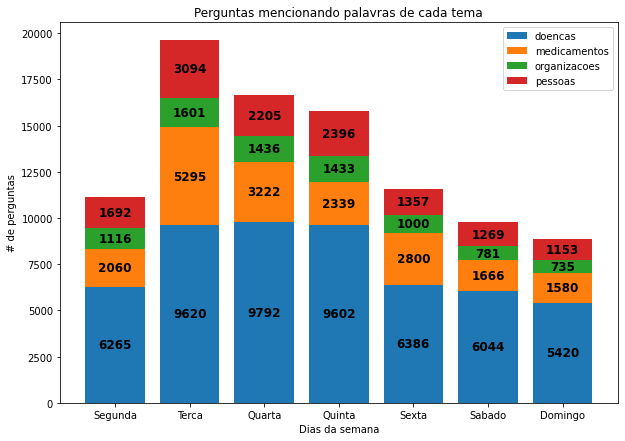

In [23]:
#Gráfico da quantidade de perguntas relacionadas a cada tema por dia da semana
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

doencas = [6265, 9620, 9792, 9602, 6386, 6044, 5420]
medicamentos = [2060, 5295, 3222, 2339, 2800, 1666, 1580]
organizacoes = [1116, 1601, 1436, 1433, 1000, 781, 735]
pessoas = [1692, 3094, 2205, 2396, 1357, 1269, 1153]

ax1 = ax.bar(x = weekday_name, height = doencas, label = 'doencas')
ax2 = ax.bar(x = weekday_name, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = weekday_name, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = weekday_name, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')

for r1, r2, r3, r4 in zip(ax1, ax2, ax3, ax4):
    h1 = r1.get_height()
    h2 = r2.get_height()
    h3 = r3.get_height()
    h4 = r4.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%d' % h1, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%d' % h2, ha ='center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r3.get_x() + r3.get_width() / 2., h1 + h2 + h3 / 2., '%d' % h3, ha = 'center', va ='center', color = 'black', fontsize = 12, fontweight = 'bold')
    plt.text(r4.get_x() + r4.get_width() / 2., h1 + h2 + h3 + h4 / 2., '%d' % h4, ha = 'center', va = 'center', color = 'black', fontsize = 12, fontweight = 'bold')

plt.legend()
plt.show()

Em 4 de fevereiro (terça-feira) o presidente decretou estado de emergência para conter o novo coronavírus no Brasil.

Em 25 de fevereiro de 2020  (terça-feira) , o Hospital Israelita Albert Einstein registrou a notificação daquele que, no dia seguinte, pelo Ministério da Saúde, seria confirmado como o primeiro caso de COVID-19 no Brasil

Em 17 de março de 2020 (terça-feira), na manhã, o Estado de São Paulo confirmou a primeira morte no Brasil, de um homem de 62 anos que estava internado em um hospital particular.

No dia 5 de maio (terça-feira), o Brasil registrou 600 mortes em 24 horas. Foi o maior número de mortes em um dia desde o início da pandemia.

In [24]:
df_duvidasDB['texto'][df_duvidasDB['data'] == '04-02-2020']

41        riot fazendo Clash na data do carnaval...a esc...
288                                     e você também acha?
301       Você acha mesmo que o coronavirus vai sobreviv...
474       @indiatvnews @recalleleitoral Coronavirus.já r...
550       E se o #CoronaVirus for apenas uma estratégia ...
                                ...                        
195503    @n_medeiros16 que historia é essa de suspeita ...
195649    @Joao_Almirante Eu já sobrevivi a isso, acha q...
196061                       am I going absolutely insane??
196318                                  Que demora é essa!?
196578      o que que é o corona vírus perto das beliebers?
Name: texto, Length: 1104, dtype: object

#Visão Temporal

###Dia da Semana

In [25]:
#Quantidade de perguntas por dia da semana
df_duvidasDB['dia_da_semana'].value_counts()

Terca      39416
Quarta     34264
Quinta     32583
Segunda    28650
Sexta      23407
Domingo    19341
Sabado     18930
Name: dia_da_semana, dtype: int64

In [26]:
#Quantidade de perguntas por dia da semana, na ordem
quantidade = df_duvidasDB['dia_da_semana'].value_counts().reset_index()
quantidade.columns = ['dia_da_semana', 'quantidade']

weekday_name = ['Segunda', 'Terca', 'Quarta', 'Quinta', 'Sexta', 'Sabado', 'Domingo']
mapping = {day: i for i, day in enumerate(weekday_name)}
key = quantidade['dia_da_semana'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('dia_da_semana')
quantidade

quantidade
dia_da_semana            
Segunda             28650
Terca               39416
Quarta              34264
Quinta              32583
Sexta               23407
Sabado              18930
Domingo             19341

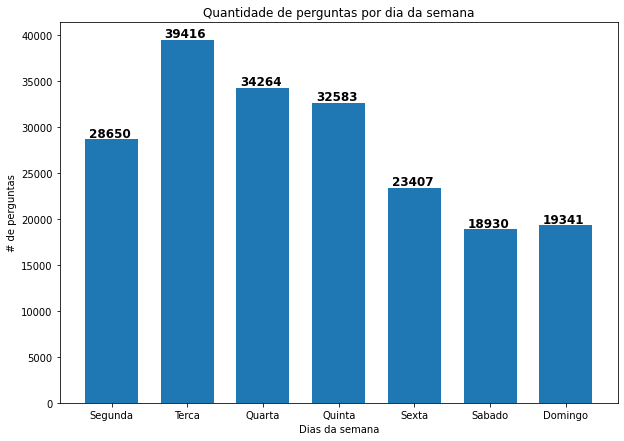

In [27]:
#Gráfico da quantidade de perguntas por dia da semana
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax  = fig.add_subplot(1, 1, 1)

dados = [28650, 39416, 34264, 32583, 23407, 18930, 19341]

ax.bar(x = weekday_name, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por dia da semana')
plt.xlabel('Dias da semana')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
    plt.text(x = (index-0.30), y = (data*1.01), s = data, fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

Em 4 de fevereiro (terça-feira) o presidente decretou estado de emergência para conter o novo coronavírus no Brasil.

Em 25 de fevereiro de 2020  (terça-feira) , o Hospital Israelita Albert Einstein registrou a notificação daquele que, no dia seguinte, pelo Ministério da Saúde, seria confirmado como o primeiro caso de COVID-19 no Brasil

Em 17 de março de 2020 (terça-feira), na manhã, o Estado de São Paulo confirmou a primeira morte no Brasil, de um homem de 62 anos que estava internado em um hospital particular.

No dia 5 de maio (terça-feira), o Brasil registrou 600 mortes em 24 horas. Foi o maior número de mortes em um dia desde o início da pandemia.

In [28]:
df_duvidasDB['texto'][df_duvidasDB['data'] == '04-02-2020']

41        riot fazendo Clash na data do carnaval...a esc...
288                                     e você também acha?
301       Você acha mesmo que o coronavirus vai sobreviv...
474       @indiatvnews @recalleleitoral Coronavirus.já r...
550       E se o #CoronaVirus for apenas uma estratégia ...
                                ...                        
195503    @n_medeiros16 que historia é essa de suspeita ...
195649    @Joao_Almirante Eu já sobrevivi a isso, acha q...
196061                       am I going absolutely insane??
196318                                  Que demora é essa!?
196578      o que que é o corona vírus perto das beliebers?
Name: texto, Length: 1104, dtype: object

###Hora

In [29]:
#Quantidade de perguntas por hora
df_duvidasDB['hora'].value_counts()

23    27870
22    18224
21    16464
20    15972
19    14408
18    12534
17    11810
16    11198
15     9486
14     7917
13     7464
00     6045
12     5914
01     5661
02     4915
11     4796
03     4107
10     2936
04     2512
05     1753
09     1629
06     1050
08      999
07      927
Name: hora, dtype: int64

In [30]:
#Quantidade de perguntas por hora, nessa ordem
quantidade = df_duvidasDB['hora'].value_counts().reset_index()
quantidade.columns = ['hora', 'quantidade']

horario = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

mapping = {hour: i for i, hour in enumerate(horario)}
key = quantidade['hora'].map(mapping)

quantidade = quantidade.iloc[key.argsort()].set_index('hora')
quantidade

quantidade
hora            
00          6045
01          5661
02          4915
03          4107
04          2512
05          1753
06          1050
07           927
08           999
09          1629
10          2936
11          4796
12          5914
13          7464
14          7917
15          9486
16         11198
17         11810
18         12534
19         14408
20         15972
21         16464
22         18224
23         27870

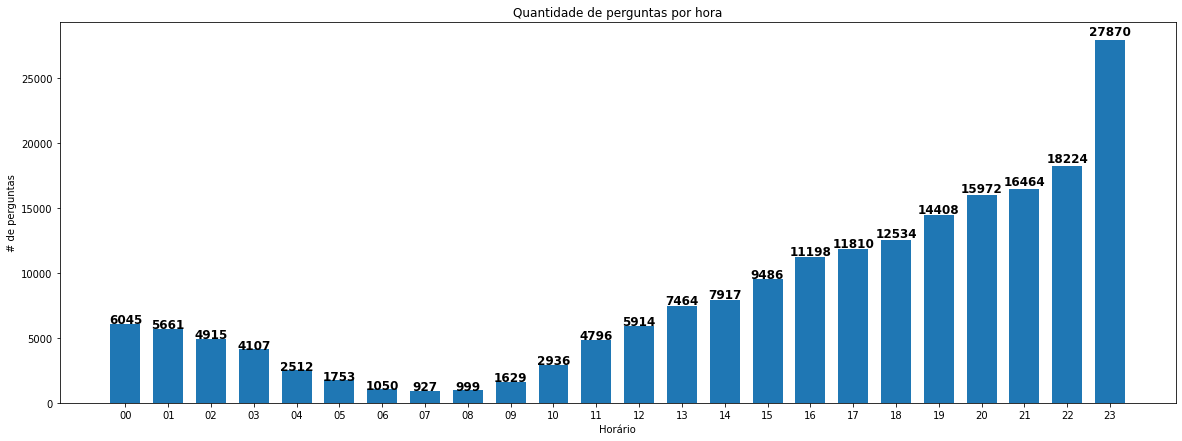

In [31]:
#Gráfico da quantidade de perguntas por hora
fig = plt.figure(figsize = (20, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

dados = [6045, 5661, 4915, 4107, 2512, 1753, 1050, 927, 999, 1629, 2936, 4796, 5914, 7464, 7917, 9486, 11198, 11810, 12534, 14408, 15972, 16464, 18224, 27870]

ax.bar(x = horario, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por hora')
plt.xlabel('Horário')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
  plt.text(x = index, y = (data * 1.015), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show()

###Mês

In [32]:
#Quantidade de perguntas por mês
df_duvidasDB['data'] = df_duvidasDB['data'].astype('datetime64')
quantidade = df_duvidasDB.groupby(df_duvidasDB['data'].dt.month)['texto'].count().reset_index()
quantidade

data  texto
0      1  14681
1      2  13471
2      3  44185
3      4  24570
4      5  43712
5      6  19445
6      7  10365
7      8   6562
8      9   3721
9     10   3528
10    11   4810
11    12   7541

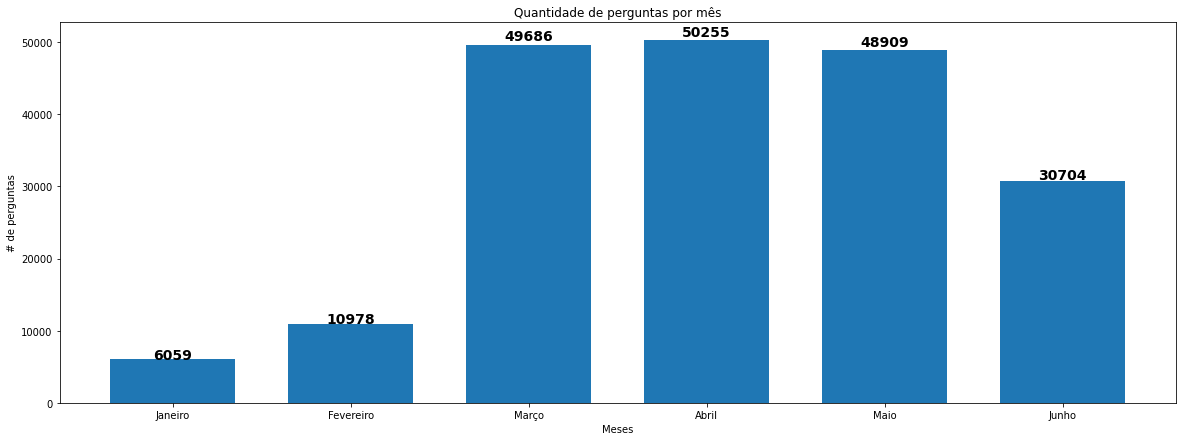

In [33]:
#Gráfico da quantidade de perguntas por mês
fig = plt.figure(figsize = (20, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
dados = [6059, 10978, 49686, 50255, 48909, 30704]

ax.bar(x = meses, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por mês')
plt.xlabel('Meses')
plt.ylabel('# de perguntas')

for index,data in enumerate(dados):
  plt.text(x = index, y = (data * 1.012), s = data, horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 14))

#Visão Geográfica

###País

In [34]:
#Quantidade de perguntas por país
df_duvidasDB['pais'].value_counts()

Brazil                        8130
Portugal                       266
United States                  113
Italy                           50
United Kingdom                  46
Spain                           34
France                          26
Republic of Mozambique          26
Canada                          25
Argentina                       17
Ireland                         15
Angola                          10
Japan                            8
Colombia                         6
New Zealand                      6
Germany                          6
Nigeria                          6
Belgium                          6
Switzerland                      6
Chile                            6
The Netherlands                  5
Peru                             5
India                            4
Australia                        4
Bahrain                          4
Cape Verde                       3
People's Republic of China       3
Egypt                            3
South Africa        

In [35]:
#Quantidade (acima de 10) de perguntas por país
count = df_duvidasDB['pais'].value_counts().reset_index()
count.columns = ['pais', 'quantidade']
qtd = count[count.quantidade >= 10]
qtd.values

array([['Brazil', 8130],
       ['Portugal', 266],
       ['United States', 113],
       ['Italy', 50],
       ['United Kingdom', 46],
       ['Spain', 34],
       ['France', 26],
       ['Republic of Mozambique', 26],
       ['Canada', 25],
       ['Argentina', 17],
       ['Ireland', 15],
       ['Angola', 10]], dtype=object)

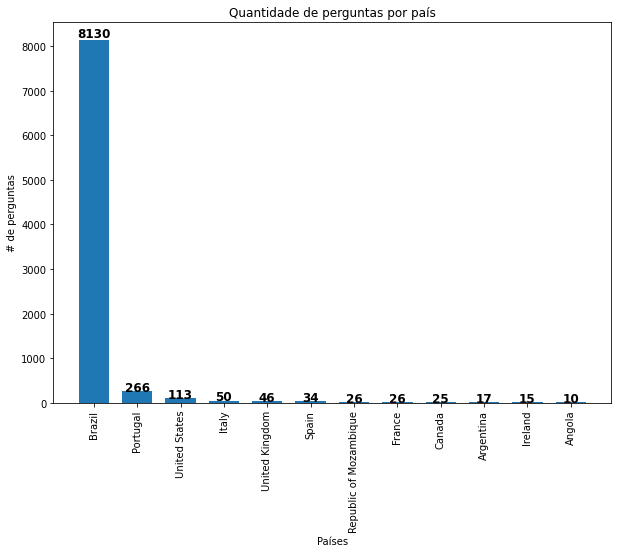

In [36]:
#Gráfico da quantidade (acima de 10) de perguntas por país
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

paises = ['Brazil','Portugal','United States','Italy','United Kingdom','Spain','Republic of Mozambique','France','Canada','Argentina','Ireland','Angola']
dados = [8130,266,113,50,46,34,26,26,25,17,15,10]

ax.bar(x = paises, height = dados, width = 0.7)

plt.title('Quantidade de perguntas por país')
plt.xlabel('Países')
plt.ylabel('# de perguntas')
plt.xticks(rotation = 90)

for index,data in enumerate(dados):
    plt.text(x = index, y = (data*1.01), s = data , horizontalalignment = 'center', fontweight = 'bold', fontdict = dict(fontsize = 12))

plt.show();

In [37]:
#Quantidade de perguntas relacionadas a cada tema por país
df_duvidasDB.groupby('pais')[['doencas','medicamentos','organizacoes','pessoas']].count()

doencas  medicamentos  organizacoes  pessoas
pais                                                                    
Angola                            5             0             0        0
Argentina                         9             0             0        0
Armenia                           1             0             1        0
Australia                         1             0             0        0
Austria                           1             0             0        0
Bahrain                           1             0             1        0
Belgium                           2             0             0        0
Bolivia                           0             0             0        0
Brazil                         2148           656           308      522
Canada                            8             2             1        1
Cape Verde                        1             0             0        0
Chile                             2             0             1        0
Colombia                          2             0             0        0
Cuba                              0             0             0        0
Denmark                           0             0             0        0
Dominican Republic                0             0             0        0
Egypt                             1             0             0        0
France                            5             0             1        2
Germany                           1             0             0        1
Ghana                             0             0             0        0
Guadeloupe                        1             0             0        0
India                             0             0             0        1
Indonesia                         0             0             0        0
Ireland                           2             2             0        1
Israel                            0             0             0        0
Italy                             7             1             0        1
Japan                             1             1             0        1
Kazakhstan                        0             0             0        0
Kingdom of Saudi Arabia           0             1             0        0
Luxembourg                        1             0             0        0
Malaysia                          0             0             0        0
Mexico                            1             0             0        0
Monaco                            0             0             0        0
Morocco                           0             0             0        0
New Zealand                       1             1             0        1
Nigeria                           1             0             0        0
Norway                            1             0             0        0
Pakistan                          0             0             0        0
Paraguay                          1             0             0        0
People's Republic of China        2             0             0        0
Peru                              3             0             0        0
Poland                            0             0             0        0
Portugal                        100             4             6        4
Republic of Mozambique            8             0             0        0
Romania                           1             0             0        0
South Africa                      1             0             1        0
Spain                            10             2             0        0
Sri Lanka                         1             0             0        0
Sweden                            0             0             0        1
Switzerland                       1             0             1        0
Taiwan                            1             0             0        0
The Netherlands                   0             0             0        0
Trinidad and Tobago               0             0             0        0
Turkey       

In [38]:
#Quantidade (acima de 10) de perguntas relacionadas a cada tema por país
quantidade = df_duvidasDB.groupby('pais')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()
qtd = quantidade[quantidade.doencas >= 10]
qtd

pais  doencas  medicamentos  organizacoes  pessoas
8           Brazil     2148           656           308      522
42        Portugal      100             4             6        4
46           Spain       10             2             0        0
55  United Kingdom       12             0             2        2
56   United States       33             5             6       10

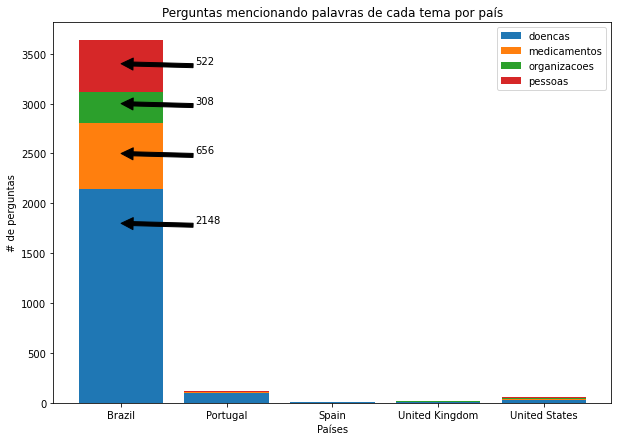

In [39]:
#Gráfico da quantidade (acima de 10) de perguntas relacionadas a cada tema por país
fig = plt.figure(figsize = (10, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

paises = ['Brazil', 'Portugal', 'Spain', 'United Kingdom', 'United States']

doencas = [2148, 100, 10, 12, 33]
medicamentos = [656, 4, 2, 0, 5]
organizacoes = [308, 6, 0, 2, 6]
pessoas = [522, 4, 0, 2, 10]

ax1 = ax.bar(x = paises, height = doencas, label = 'doencas')
ax2 = ax.bar(x = paises, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = paises, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = paises, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema por país')
plt.xlabel('Países')
plt.ylabel('# de perguntas')

plt.annotate('2148', xy = (0, 1800), xytext = (0.7, 1800), arrowprops = dict(facecolor = 'black'))
plt.annotate('656', xy = (0, 2500), xytext = (0.7, 2500), arrowprops = dict(facecolor = 'black'))
plt.annotate('308', xy = (0, 3000), xytext = (0.7, 3000), arrowprops = dict(facecolor = 'black'))
plt.annotate('522', xy = (0, 3400), xytext = (0.7, 3400), arrowprops = dict(facecolor = 'black'))

plt.legend()
plt.show()

###Lugar

In [40]:
#Quantidade de perguntas por lugar
df_duvidasDB['lugar'].value_counts()

Sao Paulo         1030
Rio de Janeiro     961
Brasília           314
Belo Horizonte     236
Porto Alegre       224
                  ... 
Fort Worth           1
Açailândia           1
Dias d'Ávila         1
Gravatal             1
Chatou               1
Name: lugar, Length: 1285, dtype: int64

In [41]:
#Quantidade (acima de 100) de perguntas por lugar
count = df_duvidasDB['lugar'].value_counts().reset_index()
count.columns = ['lugar', 'quantidade']
qtd = count[count.quantidade >= 100]
qtd.quantidade

0     1030
1      961
2      314
3      236
4      224
5      201
6      167
7      151
8      136
9      135
10     120
11     116
Name: quantidade, dtype: int64

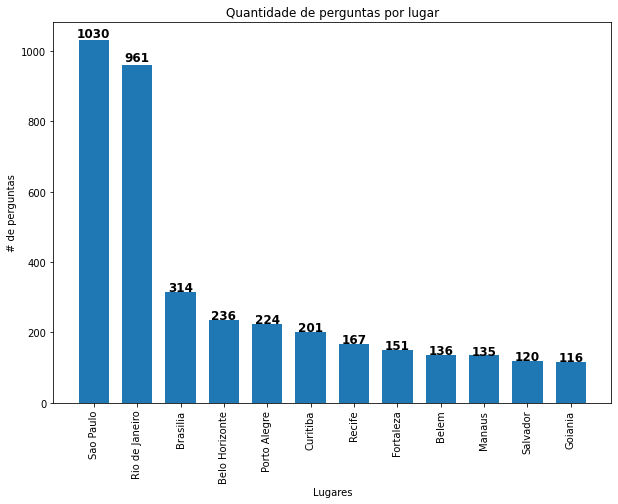

In [42]:
#Gráfico da quantidade (acima de 100) de perguntas por lugar
fig = plt.figure(figsize=(10, 7), facecolor='w')
ax  = fig.add_subplot(1,1,1)

lugares = ['Sao Paulo', 'Rio de Janeiro', 'Brasilia', 'Belo Horizonte', 'Porto Alegre', 'Curitiba', 'Recife', 'Fortaleza', 'Belem', 'Manaus', 'Salvador', 'Goiania']
dados = [1030, 961, 314, 236, 224, 201, 167, 151, 136, 135, 120, 116]

ax.bar(x = lugares, height = dados, width=0.7)

plt.title('Quantidade de perguntas por lugar')
plt.xlabel('Lugares')
plt.ylabel('# de perguntas')
plt.xticks(rotation = 90)

for index,data in enumerate(dados):
    plt.text(x=index, y =data*1.01, s=data , horizontalalignment='center', fontweight='bold', fontdict=dict(fontsize=12))

plt.show();

In [43]:
#Quantidade de perguntas relacionadas a cada tema por lugar
df_duvidasDB.groupby('lugar')[['doencas','medicamentos','organizacoes','pessoas']].count()

doencas  medicamentos  organizacoes  pessoas
lugar                                                                      
@oBarreiro - Capital Do MUNDO        0             0             0        0
A Coruña                             0             0             0        0
Abaetetuba                           1             1             0        0
Abrantes                             1             0             0        0
Abrera                               1             0             0        0
...                                ...           ...           ...      ...
Águas de Chapecó                     1             0             0        0
Águeda                               1             0             0        0
Évora                                0             0             0        0
Ñuñoa                                0             0             0        0
İstanbul                             0             0             0        0

[1285 rows x 4 columns]

In [44]:
#Quantidade (acima de 25) de perguntas relacionadas a cada tema por lugar
quantidade = df_duvidasDB.groupby('lugar')[['doencas','medicamentos','organizacoes','pessoas']].count().reset_index()
qtd = quantidade[quantidade.doencas >= 25]
qtd

lugar  doencas  medicamentos  organizacoes  pessoas
137   Belo Horizonte       64             9             6       14
139            Belém       38            10             4       12
175         Brasília       73            14            14       22
353         Curitiba       49            18             7       15
429        Fortaleza       44            11             3       10
452          Goiânia       26            11             5        6
685           Manaus       34            12             5        8
765            Natal       25            15             3        8
917     Porto Alegre       41            21             4       11
949           Recife       35            13             5        8
980   Rio de Janeiro      274            84            43       78
1004        Salvador       25             7             5        7
1046       Sao Paulo      246            83            32       64

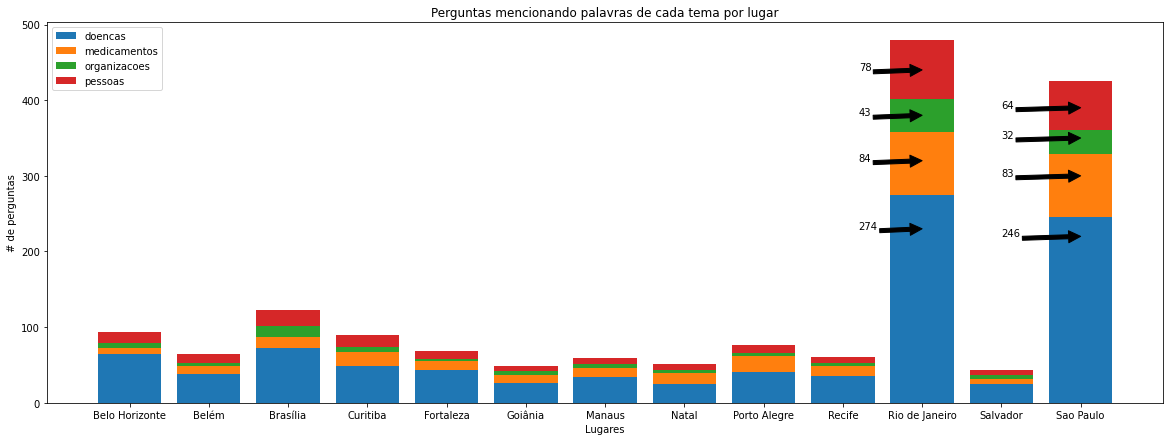

In [45]:
#Gráfico da quantidade (acima de 25) de perguntas relacionadas a cada tema por lugar
fig = plt.figure(figsize = (20, 7), facecolor = 'w')
ax = fig.add_subplot(1, 1, 1)

lugares = ['Belo Horizonte', 'Belém', 'Brasília', 'Curitiba', 'Fortaleza', 'Goiânia', 'Manaus', 'Natal', 'Porto Alegre', 'Recife', 'Rio de Janeiro', 'Salvador', 'Sao Paulo']

doencas = [64, 38, 73, 49, 44, 26, 34, 25, 41, 35, 274, 25, 246]
medicamentos = [9, 10, 14, 18, 11, 11, 12, 15, 21, 13, 84, 7, 83]
organizacoes = [6, 4, 14, 7, 3, 5, 5, 3, 4, 5, 43, 5, 32]
pessoas = [14, 12, 22, 15, 10, 6, 8, 8, 11, 8, 78, 7, 64]

ax1 = ax.bar(x = lugares, height = doencas, label = 'doencas')
ax2 = ax.bar(x = lugares, height = medicamentos, label = 'medicamentos', bottom = doencas)
ax3 = ax.bar(x = lugares, height = organizacoes, label = 'organizacoes', bottom = np.array(doencas) + np.array(medicamentos))
ax4 = ax.bar(x = lugares, height = pessoas, label = 'pessoas', bottom = np.array(doencas) + np.array(medicamentos) + np.array(organizacoes))

plt.title('Perguntas mencionando palavras de cada tema por lugar')
plt.xlabel('Lugares')
plt.ylabel('# de perguntas')

plt.annotate('274', xy = (10, 230), xytext = (9.2, 230), arrowprops = dict(facecolor = 'black'))
plt.annotate('84', xy = (10, 320), xytext = (9.2, 320), arrowprops = dict(facecolor = 'black'))
plt.annotate('43', xy = (10, 380), xytext = (9.2, 380), arrowprops = dict(facecolor = 'black'))
plt.annotate('78', xy = (10, 440), xytext = (9.2, 440), arrowprops = dict(facecolor = 'black'))

plt.annotate('246', xy = (12, 220), xytext = (11, 220), arrowprops = dict(facecolor = 'black'))
plt.annotate('83', xy = (12, 300), xytext = (11, 300), arrowprops = dict(facecolor = 'black'))
plt.annotate('32', xy = (12, 350), xytext = (11, 350), arrowprops = dict(facecolor = 'black'))
plt.annotate('64', xy = (12, 390), xytext = (11, 390), arrowprops = dict(facecolor = 'black'))

plt.legend()
plt.show()